In [4]:

#@title Import Necessary Libraries

# Data Libraries
import pandas as pd
import numpy as np

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Libraries for pipeline, Model Building and Model Evaluation

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# Load the Data Set
df = pd.read_csv('/content/drive/MyDrive/datasets/datasets/car data.csv')

In [6]:
#Change the into Lowercase
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['car_name', 'year', 'selling_price', 'present_price', 'kms_driven',
       'fuel_type', 'seller_type', 'transmission', 'owner'],
      dtype='object')

In [7]:
df.head(20)

,car_name,year,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [8]:
df.shape

(301, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   car_name       301 non-null    object 
 1   year           301 non-null    int64  
 2   selling_price  301 non-null    float64
 3   present_price  301 non-null    float64
 4   kms_driven     301 non-null    int64  
 5   fuel_type      301 non-null    object 
 6   seller_type    301 non-null    object 
 7   transmission   301 non-null    object 
 8   owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:

#  Missing values check
print("\nMissing values:\n", df.isnull().sum())



Missing values:
 car_name         0
year             0
selling_price    0
present_price    0
kms_driven       0
fuel_type        0
seller_type      0
transmission     0
owner            0
dtype: int64


In [11]:
# Find and Remove Duplicated Values in the Data set
df.duplicated().sum()
df = df.drop_duplicates()

In [12]:
import datetime

current_year = datetime.datetime.now().year
df['car_age'] = current_year - df['year']

<ipython-input-12-abcaacf694cf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['car_age'] = current_year - df['year']


In [13]:
#Remove unnecessary columns
df = df.drop(['car_name','year'], axis = 1)

In [14]:
#Identify the numerical columns
num_features = df.select_dtypes(exclude = 'object').columns

In [15]:
#Identify the categorical columns
cat_features = df.select_dtypes(include = 'object').columns

In [16]:
#Outlier Detection
df.describe()

,selling_price,present_price,kms_driven,owner,car_age
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,4.589632,7.541037,36916.752508,0.043478,11.384615
std,4.984240,8.567887,39015.170352,0.248720,2.896868
min,0.100000,0.320000,500.000000,0.000000,7.000000
25%,0.850000,1.200000,15000.000000,0.000000,9.000000
50%,3.510000,6.100000,32000.000000,0.000000,11.000000
75%,6.000000,9.840000,48883.500000,0.000000,13.000000
max,35.000000,92.600000,500000.000000,3.000000,22.000000


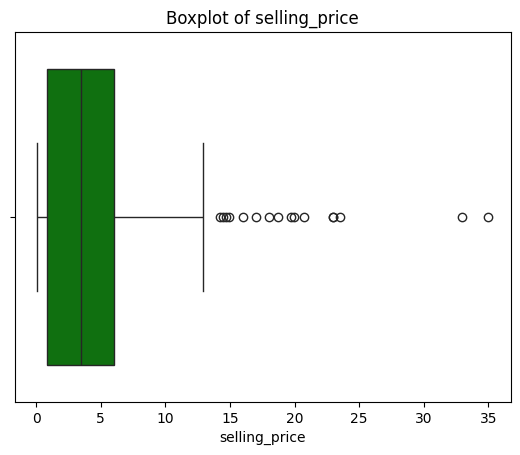

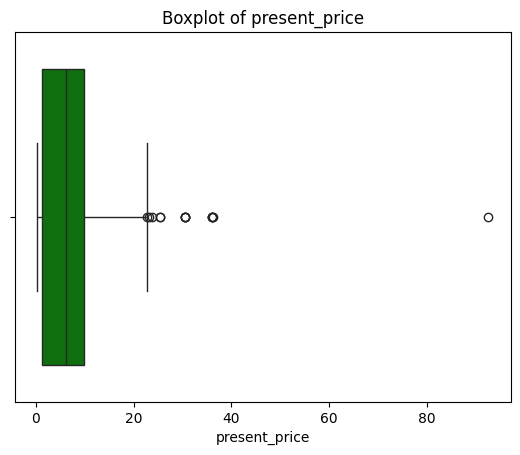

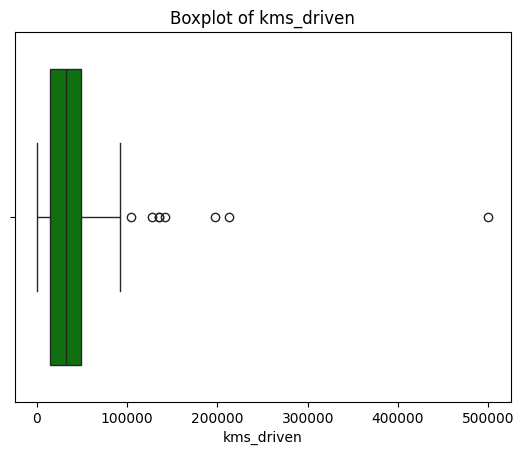

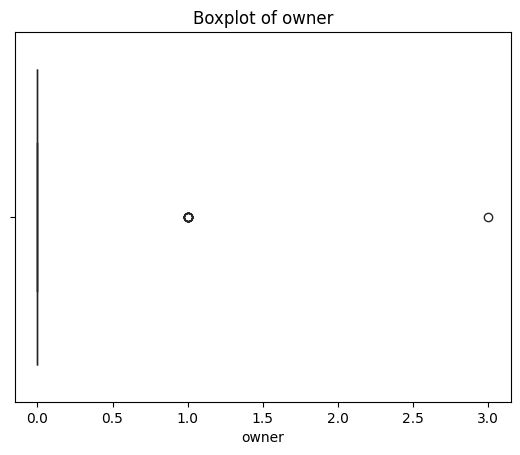

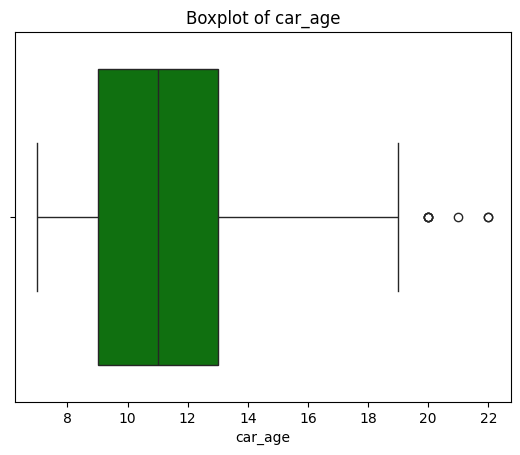

In [29]:
#Using box plot to identify the outliers

for col in num_features:
    sns.boxplot(x=df[col], color ='green')
    plt.title(f'Boxplot of {col}')
    plt.show()

In [31]:
# Remove Outliers using One the famous Method Known as Interquartile Range

for col in df[num_features].columns:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [33]:
# Precheck the Outliers before build the model Using Skew

df[num_features].skew()

,0
selling_price,0.689989
present_price,0.686399
kms_driven,0.485035
owner,0.000000
car_age,0.933260


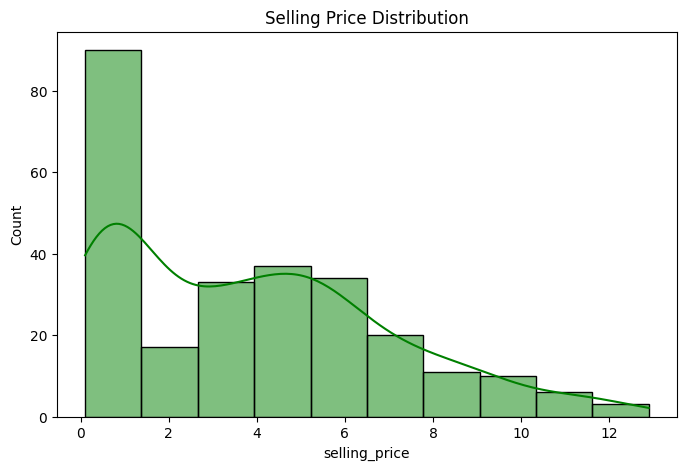

In [34]:

# 📊 Distribution of Selling Price
plt.figure(figsize=(8,5))
sns.histplot(df['selling_price'], kde=True, color='green')
plt.title('Selling Price Distribution')
plt.show()



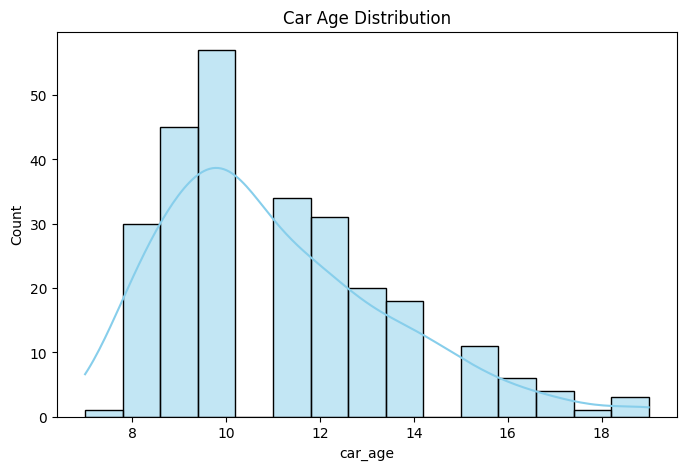

In [35]:
# 📊 Car Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df['car_age'], bins=15, kde=True, color='skyblue')
plt.title('Car Age Distribution')
plt.show()


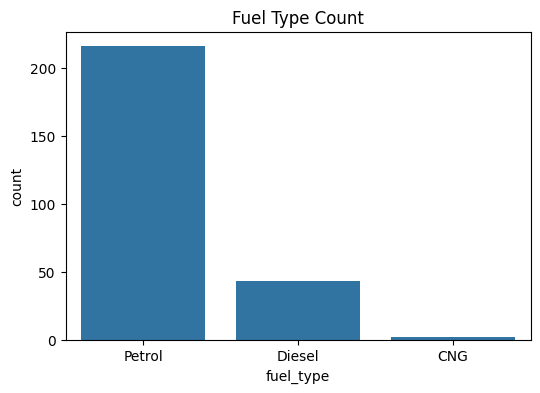

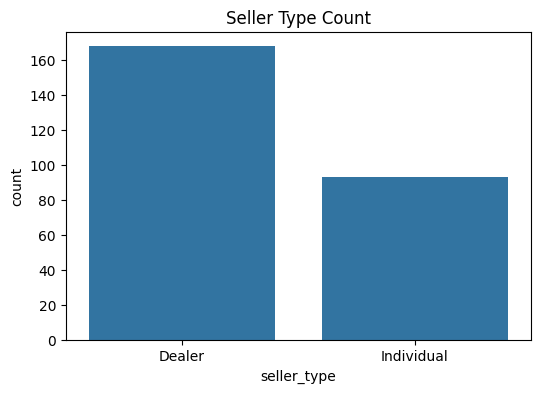

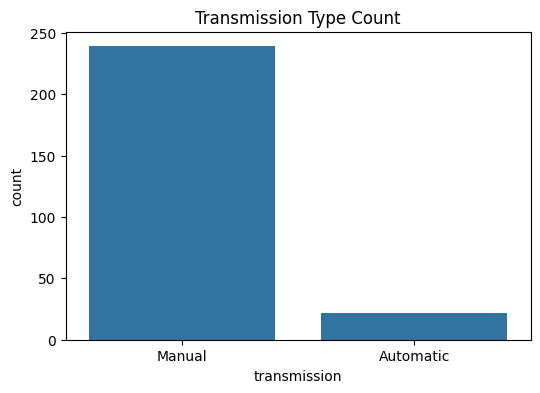

In [36]:
# 🔁 Categorical count plots
plt.figure(figsize=(6,4))
sns.countplot(x='fuel_type', data=df)
plt.title('Fuel Type Count')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='seller_type', data=df)
plt.title('Seller Type Count')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='transmission', data=df)
plt.title('Transmission Type Count')
plt.show()



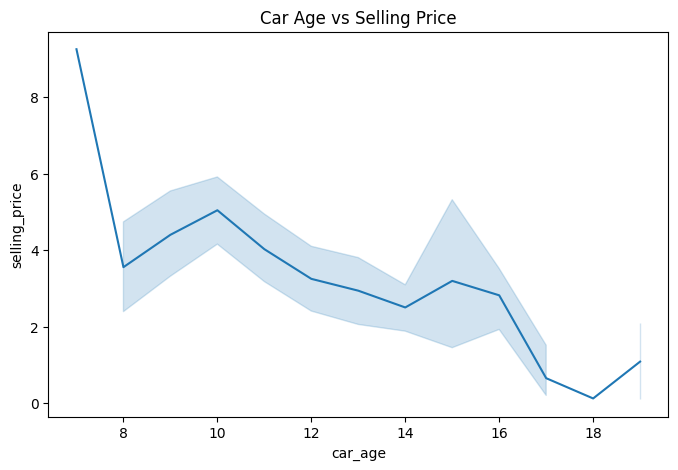

In [37]:
# 🔄 Relationship: Car Age vs Price
plt.figure(figsize=(8,5))
sns.lineplot(x='car_age', y='selling_price', data=df)
plt.title('Car Age vs Selling Price')
plt.show()



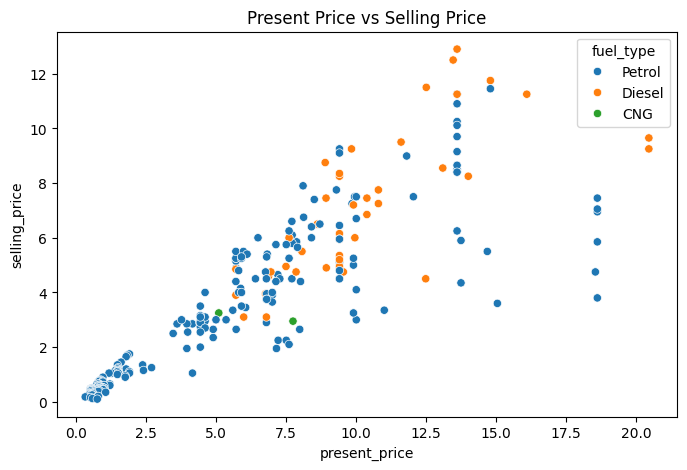

In [38]:

# 💹 Present Price vs Selling Price
plt.figure(figsize=(8,5))
sns.scatterplot(x='present_price', y='selling_price', hue='fuel_type', data=df)
plt.title('Present Price vs Selling Price')
plt.show()



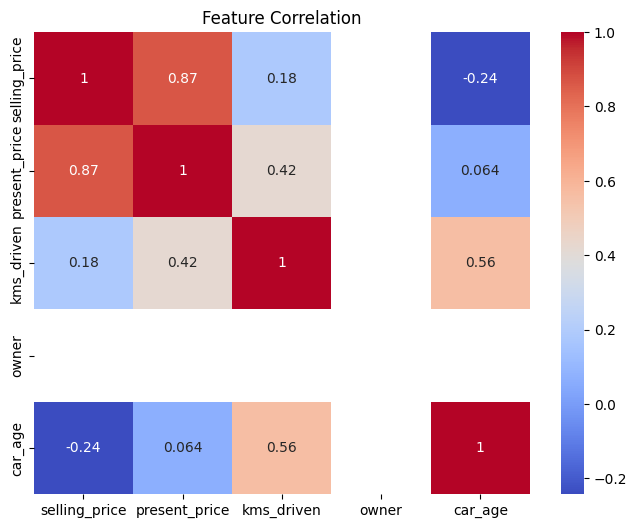

In [39]:
# 🔥 Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[num_features].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()


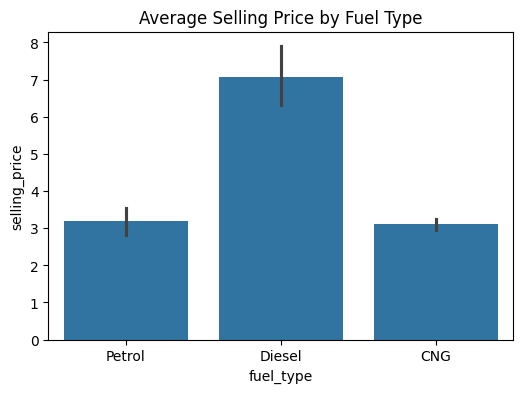

In [40]:

# 📊 Avg price by Fuel Type
plt.figure(figsize=(6,4))
sns.barplot(x='fuel_type', y='selling_price', data=df)
plt.title('Average Selling Price by Fuel Type')
plt.show()



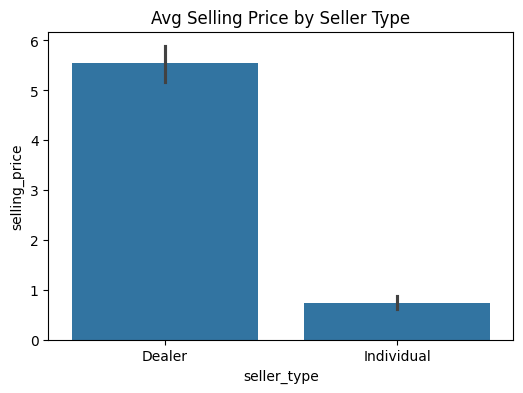

In [41]:
# 📊 Avg price by Seller Type
plt.figure(figsize=(6,4))
sns.barplot(x='seller_type', y='selling_price', data=df)
plt.title('Avg Selling Price by Seller Type')
plt.show()


In [42]:


# Split data into training and testing sets
X = df.drop('selling_price', axis=1)  # Features
y = df['selling_price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define num_features and cat_features based on X_train (or X)
num_features = X_train.select_dtypes(exclude = 'object').columns # Use X_train or X
cat_features = X_train.select_dtypes(include = 'object').columns # Use X_train or X

# Define the transformers and ColumnTransformer
num_transformer = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy = 'mean')),
    ('sclaer',StandardScaler())
])
cat_transformer = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy = 'most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown = 'ignore', categories='auto'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

# Define the model pipeline
model = Pipeline(steps =[
    ('preprocessor',preprocessor),
    ('model',RandomForestRegressor())
])

# Fit the model to the training data
model.fit(X_train, y_train)

# , axis=1)  # Features
y = df['selling_price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now define num_features and cat_features based on X_train (or X)
num_features = X_train.select_dtypes(exclude = 'object').columns # Use X_train or X
cat_features = X_train.select_dtypes(include = 'object').columns # Use X_train or X


# Fit the model to the training data
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('sclaer',
                                                                   StandardScaler())]),
                                                  Index(['present_price', 'kms_driven', 'owner', 'car_age'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['fuel_type', 'seller_type', 'transmission'], dtype='object'))])),
                ('model', RandomForestRegressor())])

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(208, 7)
(53, 7)
(208,)
(53,)


In [44]:
model.predict(X_test)

array([2.88  , 0.3888, 4.9885, 1.569 , 0.451 , 6.7058, 3.586 , 0.7473,
       6.6295, 2.7415, 2.756 , 0.6701, 1.045 , 5.0875, 8.0595, 0.4193,
       1.1218, 6.4904, 2.9465, 4.7585, 5.8505, 0.6049, 2.86  , 4.1745,
       9.3862, 0.4109, 4.4985, 7.7876, 0.2426, 7.9938, 8.611 , 7.6089,
       3.1155, 5.5935, 0.538 , 0.4404, 9.3319, 3.0705, 0.6086, 0.7683,
       0.5248, 6.1755, 3.668 , 5.257 , 5.4995, 3.023 , 1.1258, 0.4017,
       1.1477, 4.419 , 0.7255, 4.972 , 3.107 ])

In [45]:
# Example: Take user inputs
present_price = float(input("Enter Present Price of the car (in lakhs): "))
kms_driven = int(input("Enter KMs Driven: "))
fuel_type = input("Enter Fuel Type (Petrol/Diesel/CNG): ")
seller_type = input("Enter Seller Type (Dealer/Individual): ")
transmission = input("Enter Transmission Type (Manual/Automatic): ")
owner = int(input("Enter Owner (0/1/2/3): "))
car_age = int(input("Enter Car Age: "))

# Create a DataFrame from user input
user_data = pd.DataFrame({
    'present_price': [present_price],
    'kms_driven': [kms_driven],
    'fuel_type': [fuel_type],
    'seller_type': [seller_type],
    'transmission': [transmission],
    'owner': [owner],
    'car_age': [car_age]
})

# Now predict
predicted_price = model.predict(user_data)

print(f"\n✅ The predicted selling price of the car is: ₹{predicted_price[0]:.2f} lakh")


Enter Present Price of the car (in lakhs): 5
Enter KMs Driven: 34342
Enter Fuel Type (Petrol/Diesel/CNG): Diesel
Enter Seller Type (Dealer/Individual): Dealer
Enter Transmission Type (Manual/Automatic): automatic
Enter Owner (0/1/2/3): 1
Enter Car Age: 3

✅ The predicted selling price of the car is: ₹3.39 lakh


In [69]:
from sklearn.metrics import r2_score

# Assuming you have your model predictions in 'y_pred' and true values in 'y_test'
r2 = r2_score(y_test, model.predict(preprocessor.transform(X_test)))

print(f"R-squared Score: {r2}")

R-squared Score: 0.9585630783684569


In [46]:
# 1. Extract Feature Importances
model = model.named_steps['model']  # your random forest inside pipeline

importances = model.feature_importances_

# 2. Get Feature Names after preprocessing
feature_names = list(preprocessor.named_transformers_['num'].get_feature_names_out()) + \
                list(preprocessor.named_transformers_['cat'].get_feature_names_out())

# 3. Create DataFrame
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)


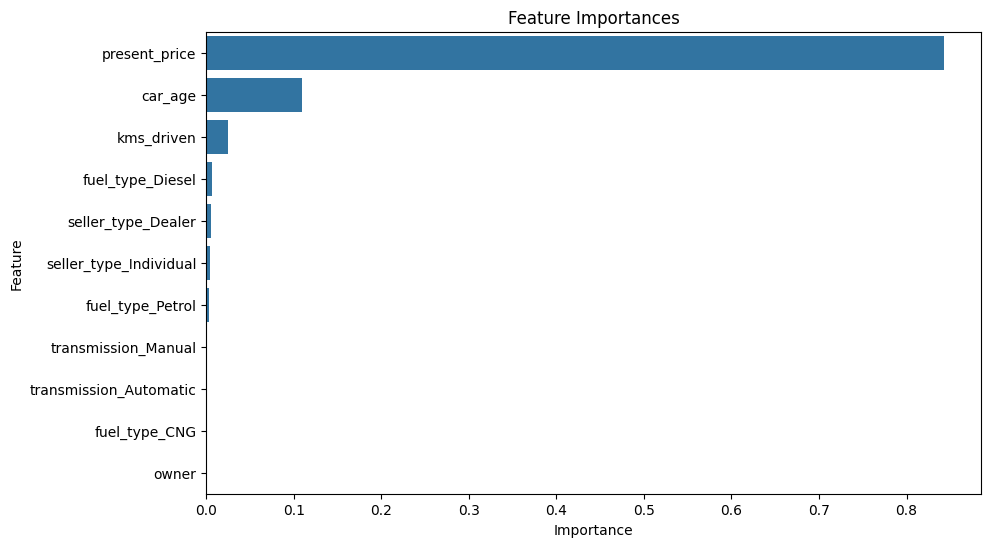

In [47]:
#4. This plot shows the importance of features

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances')
plt.show()

In [48]:
import shap
plt.style.use('fivethirtyeight')
# 1. Load explainer
explainer = shap.TreeExplainer(model)

# 2. Transform your X_test (Apply only Preprocessing)
X_test_transformed = preprocessor.transform(X_test)

# 3. Calculate SHAP values
shap_values = explainer.shap_values(X_test_transformed)

# 4. Visualize SHAP values for one prediction (e.g., first car)
shap.initjs()

# Choose which instance to explain
shap.force_plot(explainer.expected_value, shap_values[0,:], feature_names=feature_names)


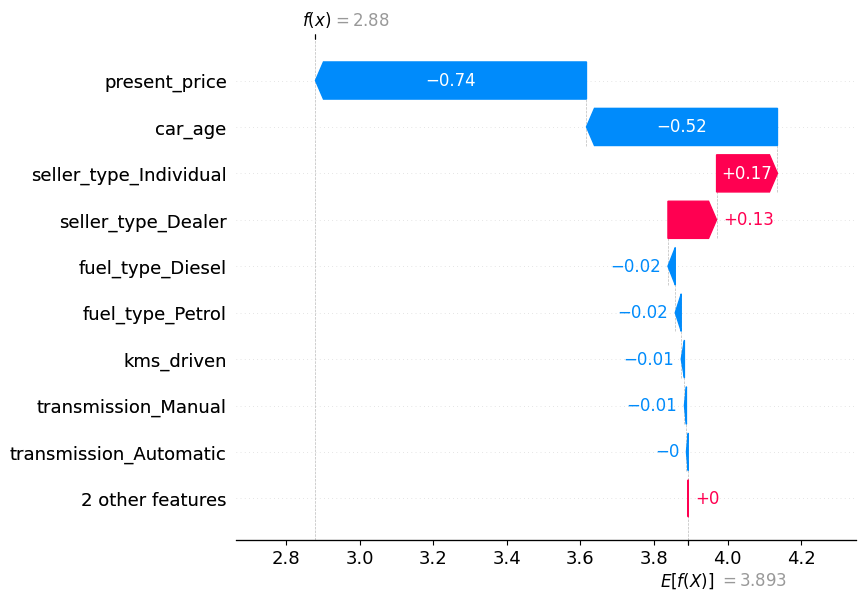

In [49]:

# Set white background
plt.style.use('default')

# Create explainer
explainer = shap.TreeExplainer(model)

# Preprocess the data
X_test_transformed = preprocessor.transform(X_test)

# Calculate shap values
shap_values = explainer.shap_values(X_test_transformed)

# Access the first element of expected_value to get a scalar
expected_value = explainer.expected_value[0]  # or explainer.expected_value[0][0] for multi-output

# Plot waterfall for one car (example: 0th car)
shap.plots._waterfall.waterfall_legacy(expected_value, shap_values[0], feature_names=feature_names)

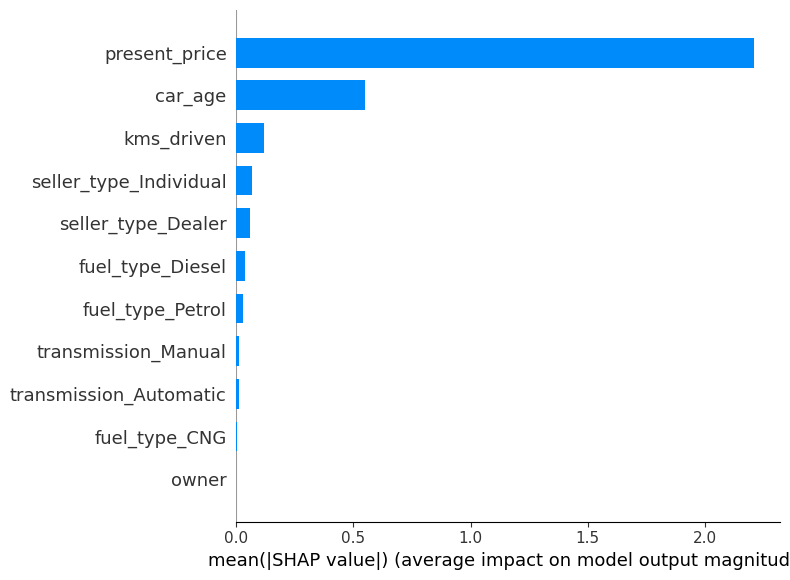

In [50]:
# Bar plot
shap.summary_plot(shap_values, features=X_test_transformed, feature_names=feature_names, plot_type="bar")


In [51]:
df.to_csv('cleaned_data.csv', index=False)

In [52]:
df

,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,owner,car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,11
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,9
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,10
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,16
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,8


In [59]:
#📌 Basic Understanding
print(df['selling_price'].min())

0.1


In [60]:
print(df['selling_price'].max())

12.9


In [61]:
print(df.groupby('fuel_type')['selling_price'].min())

fuel_type
CNG       2.95
Diesel    3.10
Petrol    0.10
Name: selling_price, dtype: float64


In [62]:
print("the Number of petrol type cars ",(df['fuel_type'] == 'Petrol').count())

the Number of petrol type cars  261


In [63]:

#How many total cars are in the dataset?
df['selling_price'].count()




261

In [64]:
#What is the average selling price of a car?
df['selling_price'].mean()


3.832183908045977

In [65]:
#What is the average age of cars?

df['car_age'].mean()

11.049808429118775

In [66]:
#What is the average kilometers driven?
df['kms_driven'].mean()

31525.011494252874